<h3 align=center> Summary Review of:</h4>
<h4 align = center> Prediction of Critical Heat Flux in Flow Boiling at Low Qualties (J.Weisman and B.S. Pei)</h5>
***
<br> </br>
<p>   Several key terms and concepts that were either refreshed or learned while reading this article are:</p>
<blockquote>
    <p><strong>Boiling Crisis(also called burnout)</strong> = a hydrodynamic phenomena at the transition from nucleate boiling to film boiling.</p>
    <p><strong>Critical Heat Flux (CHF)$ = q^{"}_{crit}\big(\frac{BTU}{h* ft^2} \text{or} \frac{W}{m^{-2}}\big) $</strong> = is the value at which the steam produced can form an insulating vapor film or layer over the surface, deteriorating the heat transfer coefficient.</p>
    <p><strong>Departure from Nucleate Boiling(DNB)</strong></p>
    <p><strong>Subcooled Fluid</strong> = a fluid at a temperature below its boiling point.</p>
    <p><strong>Nucleate Boiling</strong>:  $5°C < \Delta{T_{sat}} <30°C$</p>
    \begin{equation*}
        \\
        \text{CHF} \equiv \text{Boiling Crisis} \equiv \text{DNB}\\
        \text{excess temperature} \equiv \Delta{T_{sat}} = T_{wall} - T_{sat}\\
        \text{flow quality} \equiv \frac{\dot{m}_g}{\dot{m_{tot}}} = \frac{\dot{m}_g}{\dot{m}_g + \dot{m}_l}
    \end{equation*}
</blockquote>
___
<h3>  Additional Notes: </h3>
<h4> Reynolds number </h4>
    \begin{equation*}
       \\\\
       Re_{D,pipe} = \frac{\text{inertial forces}}{\text{viscous forces}}
       = \frac{\rho u D}{\mu}
       = \frac{u D}{\nu}
       = \frac{Q D}{\nu A}\\
       Re_x = \frac{\rho u D_H}{\mu}
       = \frac{u D_H}{\nu}
       = \frac{Q D_H}{\nu A}
    \end{equation*}
<h5 align = center> where, </h5>
    \begin{equation*}
       D_H = \frac{4A}{P} \,\&\, P = \text{wetted perimeter}\\
    \end{equation*}
<h4> Prandtl number</h4>
    \begin{equation*}
       Pr = \frac{\text{momentum diffusivity}}{\text{thermal diffusivity}}
       = \frac{\nu}{\alpha}
       = \frac{c_p \mu}{k}
    \end{equation*}
<h5 align = center> where, </h5>
    \begin{equation*}
       \nu = \text{momentum diffusivity (kinimatic viscosity)} = \frac{\mu}{\rho} \,\&\\
       \alpha =\text{thermal diffusivity} = \frac{k}{\rho c_p}\\
       k = \text{conductivity}
    \end{equation*}

<h4> Grashof number</h4>
    \begin{equation*}
       Gr_x = \frac{\text{bouyance forces}}{\text{viscous forces}}
       = \frac{g\beta}{\nu^2}(T_s - T_{\infty})x^3\\
    \end{equation*}
<h5 align = center> where, </h5>
    \begin{equation*}
       \beta = \text{coefficient of volumetric thermal expansion} \,\&\\
       g = gravity
    \end{equation*}

<h4> Rayleigh number</h4>
    \begin{equation*}
       \text{Free Convection}\\
       Ra_x = \frac{g\beta}{\nu\alpha}(T_s - T_{\infty})x^3 = Gr_x Pr
    \end{equation*}
<p> </p>
    \begin{equation*}
       \text{Wall Heating Flux}\\
       Ra = \frac{g\beta q_0^{''}}{\nu\alpha\kappa}x^4
    \end{equation*}
    
<h4> Boussinesq Approximation</h4>
    \begin{equation*}
       \rho = \rho_0\big(1-\beta(T - T_0)\big)
    \end{equation*}
     

In [1]:
from mylibrary import *
import os
#matplotlib.use('nbagg')
#     The next line is jupyter specific & only needs to be called 1/notebook.
%matplotlib inline

<h2>Moly99 Solution Variable Properties</h2>

In [2]:
l = 1.0
h = d = 0.2
ID = 0.08
molyVol = 5.0e4
volHeatGen = molyVol                         #W/m2 (q'')
#print("The volume of the 0.2m test cube is :", '{:.3e}'.format(molyVol))
print("The heat generation rate of 0.2m rectangular prism is :", '{:.3e}'.format(volHeatGen))
temp          = 25                                           # C
temp          = temp + 273.15                                # K
density       = 987.864 + 1.68197*temp - 0.00343*temp**2     #kg/m3 (rho)
dviscosity    = 0.030165 - 0.000167*temp + (2.37e-7)*temp**2        #Pa*s (mu)
conductivity  = 0.103116 + 0.002049*temp - 1.57e-6*temp**2   #W/m*C
specificHeat  = 3439.243 - 2.396*temp + 0.0032*temp**2       #J/kg*C
kviscosity    = dviscosity/density  #m2/s (nu)
#thermalExpansion = 87.97e-6        #1/T Volumetric(alpha or beta)
print("\n---------------------Fluid Properties @ 25 °C---------------------\n")
print("Density (rho):\t\t\t", '{:.8e}'.format(density))
print("Rhocp:\t\t\t\t", '{:.8e}'.format(density*specificHeat))
print("Conductivity (kappa or k):\t", '{:.8e}'.format(conductivity))
print("Dynamic Viscosity (mu):\t\t", '{:.8e}'.format(dviscosity))
print("Specific Heat (cp):\t\t", '{:.8e}'.format(specificHeat))

The heat generation rate of 0.2m rectangular prism is : 5.000e+04

---------------------Fluid Properties @ 25 °C---------------------

Density (rho):			 1.18443892e+03
Rhocp:				 3.56437296e+06
Conductivity (kappa or k):	 5.74462677e-01
Dynamic Viscosity (mu):		 1.44169113e-03
Specific Heat (cp):		 3.00933455e+03


In [3]:
Rex = density*0.05*0.01/dviscosity;
Pr = specificHeat*dviscosity/conductivity;
#Gr = 9.807*thermalExpansion*2*L**3/kviscosity**2;
#Rax = (9.807*thermalExpansion*2*L**3)/(kviscosity*(conductivity/(density*specificHeat)));
#Ra_flux = (9.807*thermalExpansion*flux*0.05**4)/(kviscosity*(conductivity/(density*specificHeat))*conductivity);
print("Reynolds number:", '{:.3e}'.format(Rex))
print("Prandtl number:", '{:.3e}'.format(Pr))
#print("Rayleigh number:", '{:.3e}'.format(Rax))
#print("Flux Rayleigh number(q''):", '{:.3e}'.format(Ra_flux))

Reynolds number: 4.108e+02
Prandtl number: 7.552e+00


<h2>Computing Speed - Moly99</h2>

In [4]:
numProcs = 360 ##(30 nodes @ 12 cores/node)
iterations = 4596
𝐶𝐹𝐿_max = 2.0
d𝑡_max = 1e-2  # seconds
compt = 3.75*24*3600 #days-->secs
simt = 42 #seconds 
tNonDim = simt/compt
print("Simulation time : Computational time =", '{:.3e}'.format(tNonDim))

Simulation time : Computational time = 1.296e-04


<h2>Gridpoints and Meshing - Moly99</h2>

In [5]:
r_inner, r_outer = 0.04, 0.10;
r0 = np.linspace(r_inner, 0.055, 15);
r = np.linspace(r0[14]+0.0026, 0.085-0.0026, 11);
r1 = np.linspace(0.085, r_outer, 15);
rtot = np.concatenate((r0,r,r1), axis=None);

theta_min, theta_max = deg2rad(0)/(2*pi), deg2rad(360)/(2*pi);
theta = np.linspace(theta_min, theta_max, 41);
thetatot = theta;

z_min, z_max = 0, 1;
z = np.linspace(z_min, z_max, 61);
ztot = z;

#print("r0",r0); print("r",r); print("r1",r1)
print("rtot",rtot); #print("size of rtot", size(rtot))

#print("theta_min",theta_min); print("theta_max",theta_max); print("theta",theta)
print("thetatot",thetatot)

#print("z_min",z_min); print("z_max",z_max);
print("ztot", ztot)

rtot [0.04       0.04107143 0.04214286 0.04321429 0.04428571 0.04535714
 0.04642857 0.0475     0.04857143 0.04964286 0.05071429 0.05178571
 0.05285714 0.05392857 0.055      0.0576     0.06008    0.06256
 0.06504    0.06752    0.07       0.07248    0.07496    0.07744
 0.07992    0.0824     0.085      0.08607143 0.08714286 0.08821429
 0.08928571 0.09035714 0.09142857 0.0925     0.09357143 0.09464286
 0.09571429 0.09678571 0.09785714 0.09892857 0.1       ]
thetatot [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]
ztot [0.         0.01666667 0.03333333 0.05       0.06666667 0.08333333
 0.1        0.11666667 0.13333333 0.15       0.16666667 0.18333333
 0.2        0.21666667 0.23333333 0.25       0.26666667 0.28333333
 0.3        0.31666667 0.33333333 0.35       0.36666667 0.38333333
 0.4     

In [8]:
%cd /Users/u225129/notebooks
notebooksDir   = os.getcwd()
cases1thru3Dir = os.path.join(notebooksDir,r'imagesCases1thru3')
casesMoly      = os.path.join(notebooksDir,r'imagesCasesMoly')
molyn6Dir      = r'/Users/u225129/Desktop/Nek5000/molyn6'
molyn8Dir      = r'/Users/u225129/Desktop/Nek5000/molyn8'
molyn10Dir     = r'/Users/u225129/Desktop/Nek5000/molyn10'


/Users/u225129/notebooks


<h3>Get Run Log Statistics</h3>

In [10]:
os.chdir(molyn6Dir)
timeN6, tempAvgN6,tempRMSN6 = np.genfromtxt(fname='runStatistics6.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn8Dir)
timeN8, tempAvgN8,tempRMSN8 = np.genfromtxt(fname='runStatistics8.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn10Dir)
timeN10, tempAvgN10,tempRMSN10 = np.genfromtxt(fname='runStatistics10.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
#os.chdir(notebooksDir)

<h3> Moly Plot</h3>

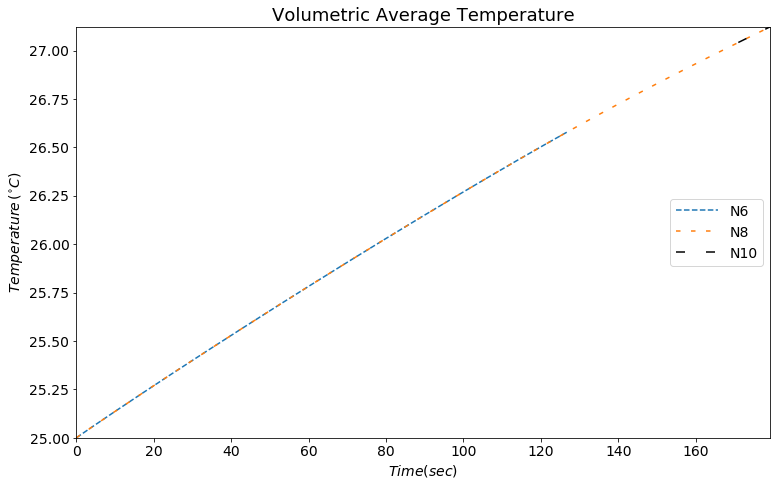

In [11]:
#    Update run stats --> Delete once runs are complete --> uncomment above cell
os.chdir(molyn6Dir)
timeN6, tempAvgN6,tempRMSN6 = np.genfromtxt(fname='runStatistics6.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
timeN6T2, tempAvgN6T2,tempRMSN6T2 = np.genfromtxt(fname='runStatistics6Take2.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn8Dir)
timeN8, tempAvgN8,tempRMSN8 = np.genfromtxt(fname='runStatistics8.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn10Dir)
timeN10, tempAvgN10,tempRMSN10 = np.genfromtxt(fname='runStatistics10.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(notebooksDir)


plt.close('all')
#    Enter x, y variables to plot:
x_var, x_var1, x_var2 = timeN6, timeN8, timeN10
y_var, y_var1, y_var2 = tempAvgN6, tempAvgN8, tempAvgN10

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var1), max(x_var1))
ax.set_ylim(min(y_var1), max(y_var1))
#ax.set_xlim(min(120,140), max(120,140))
#ax.set_ylim(min(26.5,26.66), max(26.33,26.75))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('Volumetric Average Temperature', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

n6 = ax.plot(x_var,y_var, "--", label="N6")#, linestyle=':')#, color=color)
n8 = ax.plot(x_var1,y_var1, linestyle='--', dashes=(3, 7), label="N8")#, color=color)
n10 = ax.plot(x_var2, y_var2, linestyle='--', dashes=(6, 14), color="black", label="N10")

ns = n6 + n8+ n10
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=7,handlelength=3, fontsize=14)

matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly)
fig.savefig('molyAvgTemps.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

<h3>Computational Time Statistics</h3>

In [13]:
import datetime
#datetime(year,month,day,hour(24),minute,second,microsecond)
startN6   = datetime.datetime(2018,10,29,16,21,0,0)
endN6     = datetime.datetime(2018,10,31,0,47,0,0)
deltaN6   = (endN6 - startN6)
deltaN6   = (deltaN6.days*86400 + deltaN6.seconds)/60   #minutes
print("Total N6 computational time for 127 simulation seconds:\t  ",'{:.3f}'.format(deltaN6/(60*24)),"days")

startN8   = datetime.datetime(2018,11,1,11,6,0,0)
endN8     = datetime.datetime(2018,11,4,15,43,0,0)
deltaN8   = (endN8 - startN8)
deltaN8   = (deltaN8.days*86400 + deltaN8.seconds)/60    #minutes
print("Total N8DNS computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8/(60*24)),"days")

startN8LES   = datetime.datetime(2018,11,21,11,43,0,0)
endN8LES     = datetime.datetime(2018,11,24,16,17,0,0)
deltaN8LES   = (endN8LES - startN8LES)
deltaN8LES   = (deltaN8LES.days*86400 + deltaN8LES.seconds)/60    #minutes
print("Total N8LES computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8LES/(60*24)),"days")

startN10   = datetime.datetime(2018,11,5,8,34,0,0)
endN10     = datetime.datetime(2018,11,11,22,3,0,0)
deltaN10   = (endN10 - startN10)
deltaN10   = (deltaN10.days*86400 + deltaN10.seconds)/60  #minutes
print("Total N10 computational time for 127 simulation seconds:  ", '{:.3f}'.format(deltaN10/(60*24)),"days")


Total N6 computational time for 127 simulation seconds:	   1.351 days
Total N8DNS computational time for 180 simulation seconds: 3.192 days
Total N8LES computational time for 180 simulation seconds: 3.190 days
Total N10 computational time for 127 simulation seconds:   6.562 days


<h3>Percentages @ 127 seconds</h3>

In [14]:
n8At127sec = datetime.datetime(2018,11,3,15,15,0,0)
delta2N8   = (n8At127sec - startN8)
delta2N8   = (delta2N8.days*86400 + delta2N8.seconds)/60    #minutes

n8LESAt127sec = datetime.datetime(2018,11,23,15,50,0,0)
delta2N8LES   = (n8LESAt127sec - startN8LES)
delta2N8LES   = (delta2N8LES.days*86400 + delta2N8LES.seconds)/60    #minutes

n10At127sec = datetime.datetime(2018,11,11,22,3,0,0)
delta2N10   = (n10At127sec - startN10)
delta2N10   = (delta2N10.days*86400 + delta2N10.seconds)/60    #minutes

print("N8 computational time to 127 seconds sim time:\t",'{:.2f}'.format(delta2N8/(60*24)),"days")
print("N6 is", '{:.2f}'.format((1-(deltaN6/delta2N10))*100),"% faster than N10")

print("Approximate N10 computational time to 127 seconds sim time:\t",'{:.2f}'.format(delta2N10/(60*24)),"days")
print("N8 is", '{:.2f}'.format((1-(delta2N8/delta2N10))*100),"% faster than N10")

print("Approximate N6 computational time to 127 seconds sim time:\t",'{:.2f}'.format(delta2N8LES/(60*24)),"days")
print("N8 is", '{:.2f}'.format((1-(delta2N8/delta2N10))*100),"% faster than N10")

N8 computational time to 127 seconds sim time:	 2.17 days
N6 is 79.41 % faster than N10
Approximate N10 computational time to 127 seconds sim time:	 6.56 days
N8 is 66.89 % faster than N10
Approximate N6 computational time to 127 seconds sim time:	 2.17 days
N8 is 66.89 % faster than N10


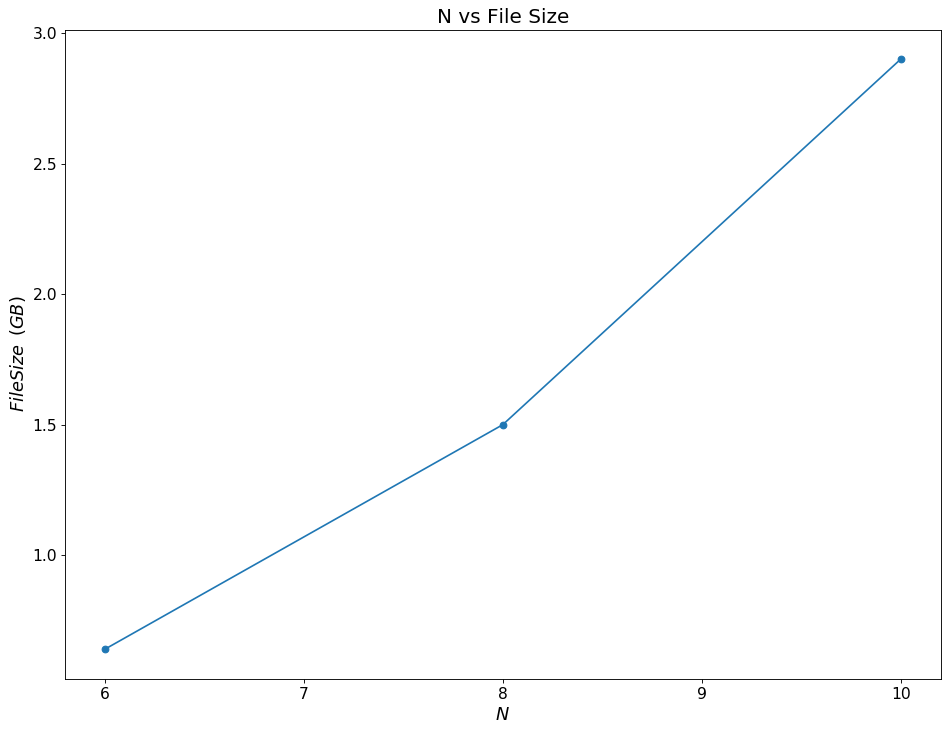

In [15]:
plt.close('all')
#    Enter x, y variables to plot:
x_var, y_var = np.array([6,8,10]), np.array([0.64, 1.5, 2.9])

#    Define plot area:
fig=plt.figure(figsize=(12, 9.25), dpi= 80, facecolor='w', edgecolor='k')

plt.title("N vs File Size",size = 18)
plt.xlabel(r'$N$', size = 16)
plt.ylabel(r'$File Size\,\,\, (GB)$', size = 16)#, color=color);

plt.xticks(np.arange(6, 11, 1), size = 14)
plt.yticks(np.arange(0, 3.25, 0.5), size = 14)

plt.plot(x_var,y_var, "-o", label="N6")

plt.tight_layout()
plt.show()

os.chdir(casesMoly)
fig.savefig('fileSizePlot.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

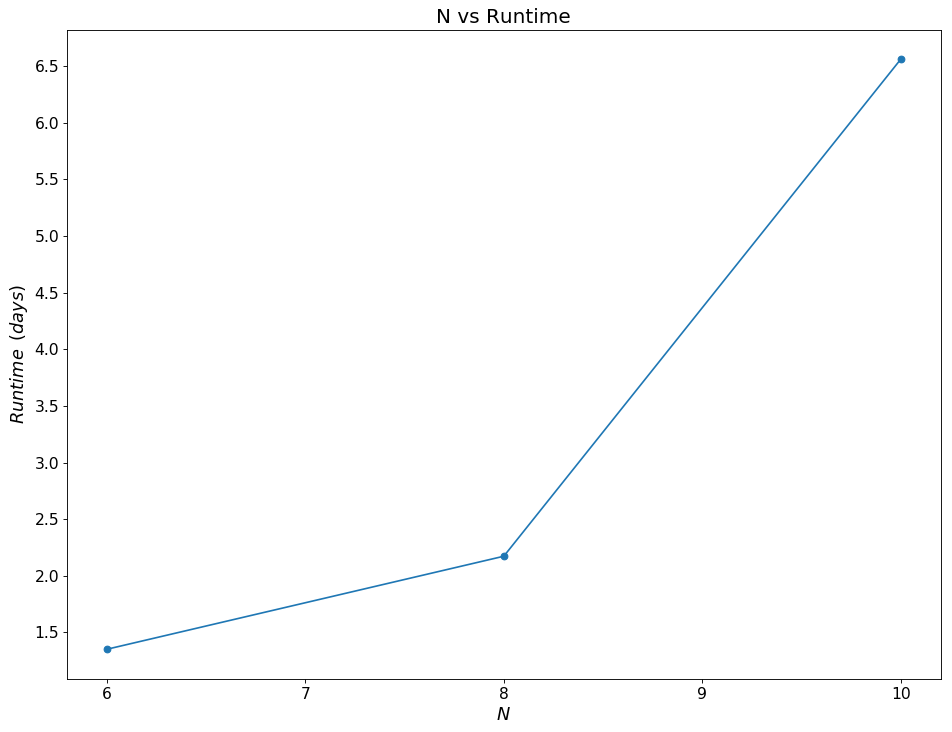

In [16]:
plt.close('all')
#    Enter x, y variables to plot:
x_var, y_var = np.array([6,8,10]), np.array([deltaN6, delta2N8, delta2N10])/(60*24)

#    Define plot area:
fig=plt.figure(figsize=(12, 9.25), dpi= 80, facecolor='w', edgecolor='k')

plt.title("N vs Runtime",size = 18)
plt.xlabel(r'$N$', size = 16)
plt.ylabel(r'$Runtime\,\,\,(days)$', size = 16)#, color=color);

plt.xticks(np.arange(6, 11, 1), size = 14)
plt.yticks(np.arange(1.0, 7.5, 0.5), size = 14)

plt.plot(x_var,y_var, "-o", label="N6")

plt.tight_layout()
plt.show()

os.chdir(casesMoly)
fig.savefig('compTimePlot.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

In [17]:
#    Update run stats --> Delete once runs are complete --> uncomment above cell
#os.chdir(molyn6Dir)
#timeN6, tempAvgN6,tempRMSN6 = np.genfromtxt(fname='runStatistics6.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
#os.chdir(molyn8Dir)
#timeN8, tempAvgN8,tempRMSN8 = np.genfromtxt(fname='runStatistics8.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
#os.chdir(molyn10Dir)
#timeN10, tempAvgN10,tempRMSN10 = np.genfromtxt(fname='runStatistics10.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
#os.chdir(notebooksDir)


plt.close('all')
#    Enter x, y variables to plot:
x_var, x_var1, x_var2, x_var3 = timeN6, timeN8[0:134], timeN6, timeN6T2
y_var  = abs((tempRMSN8[0:128]-tempRMSN6))
y_var1 = abs((tempRMSN10[0:134]-tempRMSN8[0:134]))
y_var2 = abs((tempRMSN10[0:128]-tempRMSN6))
y_var3 = abs((tempRMSN10[0:101]-tempRMSN6T2))

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
xticks(range(0,140,10))
#ax.set_ylim(min(y_var2), max(y_var2))
#ax.set_xlim(min(120,140), max(120,140))
#ax.set_ylim(min(26.5,26.66), max(26.33,26.75))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('Delta Root Mean Square Comparison', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

#n6 = ax.plot(x_var,y_var, "--", label="diffN8N6")#, linestyle=':')#, color=color)
#n8 = ax.plot(x_var1,y_var1, linestyle='--', dashes=(3, 7), label="diffN10N8")#, color=color)
#n10 = ax.plot(x_var2, y_var2, linestyle='--', dashes=(6, 14), color="black", label="diffN10N6")
n6 = ax.plot(x_var,y_var, "-", label="$\Delta\,RMS\,N8N6$")#, linestyle=':')#, color=color)
n8 = ax.plot(x_var1,y_var1, linestyle='-', label="$\Delta\,RMS\,N10N8$")#, color=color)
n10 = ax.plot(x_var2, y_var2, linestyle='-', color="black", label="$\Delta\,RMS\,N10N6$")
#n6T2 = ax.plot(x_var3,y_var3, "-", label="$\Delta\,RMS\,N8N6T2$")#, linestyle=':')#, color=color)

ns = n6 + n8 + n10# + n6T2 
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=6,handlelength=2, fontsize=14)

matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly)
fig.savefig('molyDeltaRMS.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

ValueError: operands could not be broadcast together with shapes (68,) (134,) 

<h3>Vol Avg Temp N=8: DNS vs LES</h3>

In [ ]:
#    Update run stats --> Delete once runs are complete --> uncomment above cell
os.chdir(molyn8Dir)
timeN8, tempAvgN8, tempRMSN8 = np.genfromtxt(fname='runStatistics8.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn8DirLES)
timeN8LES, tempAvgN8LES, tempRMSN8LES = np.genfromtxt(fname='runStatistics8LES.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(notebooksDir)


plt.close('all')
#    Enter x, y variables to plot:
x_var, x_var1 = timeN8, timeN8LES
y_var, y_var1 = tempAvgN8, tempAvgN8LES

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var1), max(x_var1))
ax.set_ylim(min(y_var1), max(y_var1))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('N=8: DNS vs LES', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

DNS = ax.plot(x_var,y_var, "--", label="$DNS$")#, linestyle=':')#, color=color)
LES = ax.plot(x_var1,y_var1, linestyle='--', dashes=(3, 7), label="$LES$")#, color=color)

ns = DNS + LES
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=7,handlelength=3, title="$Vol_{Avg}\,\,Temp$", fontsize=14)


matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly)
fig.savefig('LESvsDNS.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

<h3>RMS N=8: DNS vs LES</h3>

In [22]:
plt.close('all')
#    Enter x, y variables to plot:
x_var  = timeN8
y_var  = ((tempRMSN8-tempRMSN10[0:181]))
y_var1 = ((tempRMSN8LES[0:181]-tempRMSN10[0:181]))
y_var2 = ((tempRMSN8-tempRMSN8LES[0:181]))

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var)+120, max(x_var)+5)
ax.set_ylim(min(y_var1)-0.00125, 0.04875)#max(y_var1))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('RMS: DNS vs LES', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

DNS = ax.plot(x_var, y_var, linestyle='-', label="$N8_{DNS}-N10_{DNS}$")#, color=color)
LES = ax.plot(x_var, y_var1, linestyle='-', color="black", label="$N8_{LES}-N10_{DNS}$")
n8 = ax.plot(x_var, y_var2, linestyle='-', label="$N8_{DNS}-N8_{LES}$")

ns = DNS + LES + n8
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=6,handlelength=2, title = "$\Delta\,RMS$", fontsize=14)

matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly);
fig.savefig('molyRMSDNSLES.jpg', bbox_inches='tight', transparent=True);
os.chdir(notebooksDir);

ValueError: operands could not be broadcast together with shapes (181,) (68,) 

In [ ]:
max(abs((tempRMSN8[0:134]-tempRMSN8LES[0:134])));

<h3>N=8: LES vs DNS Time Comparison @ 180 seconds</h3>

In [ ]:
print("Total N8DNS computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8/(60*24)),"days")
print("Total N8LES computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8LES/(60*24)),"days")
print("N8LES is", '{:.2f}'.format((1-(deltaN8LES/deltaN8))*100),"% faster than N8DNS")


<h3>LES N=6 vs. N=8 </h3>

In [ ]:
#    Update run stats --> Delete once runs are complete --> uncomment above cell
os.chdir(molyn6DirLES)
timeN6LES, tempAvgN6LES, tempRMSN6LES = np.genfromtxt(fname='runStatistics6LES.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(molyn8DirLES)
timeN8LES, tempAvgN8LES, tempRMSN8LES = np.genfromtxt(fname='runStatistics8LES.log', skip_header=1, usecols = (1, 3, 4), unpack=True)
os.chdir(notebooksDir)


plt.close('all')
#    Enter x, y variables to plot:
x_var, x_var1 = timeN6LES, timeN8LES
y_var, y_var1 = tempAvgN6LES, tempAvgN8LES

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var1), max(x_var1))
ax.set_ylim(min(y_var1), max(y_var1))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('LES: N=6 vs. N=8', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

N6 = ax.plot(x_var,y_var, "--", label="$N=6$")#, linestyle=':')#, color=color)
N8 = ax.plot(x_var1,y_var1, linestyle='--', dashes=(3, 7), label="$N=8$")#, color=color)

ns = N6 + N8
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=7,handlelength=3, title="$Vol_{Avg}\,\,Temp$", fontsize=14)


matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly)
fig.savefig('LESN6vsN8.jpg', bbox_inches='tight', transparent=True)
os.chdir(notebooksDir)

<h3>RMS LES: N=6 vs. N=8</h3>

In [ ]:
plt.close('all')
#    Enter x, y variables to plot:
x_var  = timeN8LES[0:169]
y_var  = ((tempRMSN6LES-tempRMSN8LES[0:169]))
y_var1 = ((tempRMSN6LES-tempRMSN10[0:169]))
y_var2 = ((tempRMSN8LES[0:169]-tempRMSN10[0:169]))

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var)+50, max(x_var)+5)
ax.set_ylim(min(y_var1)-0.00125, 0.034875)#max(y_var1))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('RMS Comparison', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

n6n10 = ax.plot(x_var, y_var1, linestyle='-', label="$N6_{LES}-N10_{DNS}$")
n8n10 = ax.plot(x_var, y_var2, linestyle='-', label="$N8_{LES}-N10_{DNS}$")
n6n8 = ax.plot(x_var, y_var, linestyle='-', color="black", label="$N6_{LES}-N8_{LES}$")#, color=color)

ns =  n6n10 + n8n10 + n6n8
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=6,handlelength=2, title = "$\Delta\,RMS$", fontsize=14)

matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
os.chdir(casesMoly);
fig.savefig('molyRMSLESN6N8.jpg', bbox_inches='tight', transparent=True);
os.chdir(notebooksDir);

In [ ]:
max(abs((tempRMSN8[0:134]-tempRMSN8LES[0:134])));

In [ ]:
timeN6LES

<h3>LES: N=8 vs N=6 Time Comparison @ 170 seconds</h3>

In [ ]:
startN6LES   = datetime.datetime(2018,11,27,12,33,0,0)
endN6LES     = datetime.datetime(2018,11,29,15,51,0,0)
deltaN6LES   = (endN6LES - startN6LES)
deltaN6LES   = (deltaN6LES.days*86400 + deltaN6LES.seconds)/60    #minutes
print("Total N6LES computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN6LES/(60*24)),"days")
startN8LES   = datetime.datetime(2018,11,21,11,43,0,0)
endN8LES     = datetime.datetime(2018,11,24,11,45,0,0)
deltaN8LES   = (endN8LES - startN8LES)
deltaN8LES   = (deltaN8LES.days*86400 + deltaN8LES.seconds)/60    #minutes
print("Total N8DNS computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8/(60*24)),"days")
print("Total N8LES computational time for 180 simulation seconds:",'{:.3f}'.format(deltaN8LES/(60*24)),"days")
print("N6LES is", '{:.2f}'.format((1-(deltaN6LES/deltaN8LES))*100),"% faster than N8LES")


<h3> Ethereum Cost Basis</h3>

In [ ]:
print("My ethereum coin basis is $",'{:3.2f}'.format(740/2.79135929))

In [ ]:
timeN10